<a href="https://colab.research.google.com/github/BoWarburton/DS-Unit-2-Applied-Modeling/blob/master/Bo_Warburton_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML Problem

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [X] Choose your target. Which column in your tabular dataset will you predict?
- [X] Is your problem regression or classification?
- [X] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [X] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [X] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [X] Begin to clean and explore your data.
- [X] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

## The Data: COB Sales and HUNS at Five KFC Stores from 2018 and 2019

In [0]:
# Each row is Chicken on Bone (COB) and Heads Used but Not Sold (HUNS) for one date at one KFC
import pandas as pd
data_file = 'https://github.com/BoWarburton/heads-used-not-sold/raw/master/huns.csv'
df = pd.read_csv(data_file)

In [4]:
df.head()

,StoreCode,Date,ChickenHuns,1pc,2 pc,3 pc,4 pc,8pc,8pc Meal,12 pc,12 pc Meal,16 pc,16 pc Meal,20 pc,20 pc Meal
0,C750001,20180221,20.625,23,61,10,0,29,1,7,1,4,0,1,1
1,C750001,20180222,18.125,19,78,5,0,23,3,14,0,9,1,0,0
2,C750001,20180223,14.875,16,68,8,0,34,1,10,2,7,1,1,0
3,C750001,20180224,25.875,17,48,4,0,29,2,9,1,5,1,0,0
4,C750001,20180225,24.500,21,43,6,0,27,3,14,1,5,1,0,0


In [6]:
df.shape

(3530, 15)

In [7]:
df.describe()

,Date,ChickenHuns,1pc,2 pc,3 pc,4 pc,8pc,8pc Meal,12 pc,12 pc Meal,16 pc,16 pc Meal,20 pc,20 pc Meal
count,3.530000e+03,3530.000000,3530.000000,3530.00000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000
mean,2.018706e+07,17.155524,13.025779,41.30085,6.333144,2.237960,6.272238,2.341643,5.910198,1.699433,3.461190,0.987252,0.273088,0.322380
std,5.988819e+03,36.131985,8.964851,15.46182,5.611545,2.649557,5.881116,1.757144,3.246575,1.475991,2.381875,1.212996,0.598653,0.778198
min,2.018022e+07,-548.500000,0.000000,3.00000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2.018082e+07,10.750000,7.000000,30.00000,2.000000,0.000000,2.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,2.019022e+07,15.500000,13.000000,40.00000,5.000000,1.000000,4.000000,2.000000,5.000000,1.000000,3.000000,1.000000,0.000000,0.000000
75%,2.019082e+07,21.000000,19.000000,51.00000,9.000000,4.000000,9.000000,3.000000,8.000000,2.000000,5.000000,2.000000,0.000000,0.000000
max,2.020022e+07,1053.500000,54.000000,110.00000,38.000000,15.000000,34.000000,14.000000,22.000000,9.000000,22.000000,14.000000,6.000000,11.000000


In [8]:
df.dtypes

StoreCode       object
Date             int64
ChickenHuns    float64
1pc              int64
2 pc             int64
3 pc             int64
4 pc             int64
8pc              int64
8pc Meal         int64
12 pc            int64
12 pc Meal       int64
16 pc            int64
16 pc Meal       int64
20 pc            int64
20 pc Meal       int64
dtype: object

In [46]:
df.ChickenHuns.value_counts()

 12.875    37
 14.625    35
 14.375    33
 10.000    30
 15.875    29
           ..
 2.250      1
-5.250      1
-9.500      1
-10.000     1
 57.375     1
Name: ChickenHuns, Length: 500, dtype: int64

In [48]:
df.ChickenHuns.isnull().sum()

0

In [49]:
df.StoreCode.value_counts()

C750036    725
C750002    725
C750004    725
C750001    685
C750081    670
Name: StoreCode, dtype: int64

In [50]:
df.Date.value_counts()

20191231    5
20180719    5
20191024    5
20191022    5
20191020    5
           ..
20190810    4
20190808    4
20190806    4
20190804    4
20181002    4
Name: Date, Length: 725, dtype: int64

## The Target: ChickenHuns
Heads Used but Not Sold (HUNS) is a measure of money lost and food wasted.

## The Problem: Regression
ChickenHuns is a continuous, numeric variable. Therefore, this is a regressions problem.

But would it be worthwhile to great ChickenHuns as categorical? Examples would be yes/no or none/little/much.

## The Distribution: Right-Skewed
The distribution is right-skewed.

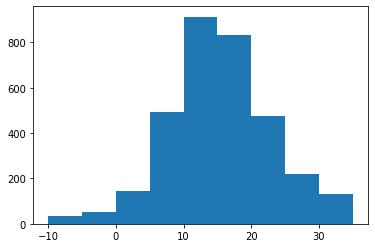

In [10]:
from matplotlib import pyplot as plt
plt.hist(df['ChickenHuns'], bins=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35])
plt.show();

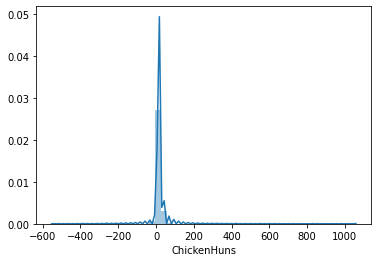

In [12]:
import seaborn as sns
sns.distplot(df['ChickenHuns']);

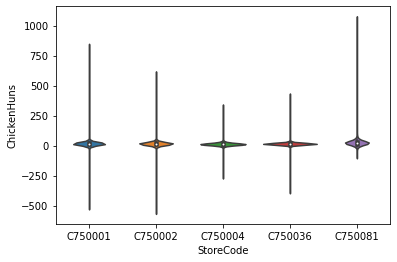

In [14]:
sns.violinplot(x='StoreCode', y='ChickenHuns', data=df);

## The Evaluation Metric: R^2
Evaluation metric(s) for this regression problem will be mean absolute error.

In [24]:
# Baseline is average
print(f'Baseline average HUNS is: {df["ChickenHuns"].mean()*100:.2f}')

Baseline average HUNS is: 1715.55


## The Observations: Exclude Outliers; Time-Based Split
I'd rather not use date, because this time period includes management and other changes. Possibly I should try random and time based splits.

Then again, not using date might incur the problem of time travel.

Try it both ways and see.

At first glance, it appears that HUNS is roughly normal in a range from -548.5 to 1053.5. But this looks incorrect: neither negative nor very high numbers make sense. Get rid of negative numbers and very high numbers.

The same goes for other features, if necessary.

# Data Cleaning and Exploration
- Get rid of outliers
- Get rid of negative numbers

## Note to self:
Check with the business about negative numbers. Maybe that is a correct bookkeeping type detail.

In [0]:
huns = df.copy()

In [29]:
huns['ChickenHuns'].describe().T

count    3530.000000
mean       17.155524
std        36.131985
min      -548.500000
25%        10.750000
50%        15.500000
75%        21.000000
max      1053.500000
Name: ChickenHuns, dtype: float64

In [34]:
huns['ChickenHuns'].value_counts()

 12.875    37
 14.625    35
 14.375    33
 10.000    30
 15.875    29
           ..
 2.250      1
-5.250      1
-9.500      1
-10.000     1
 57.375     1
Name: ChickenHuns, Length: 500, dtype: int64

Text(0.5, 1.0, 'HUNS')

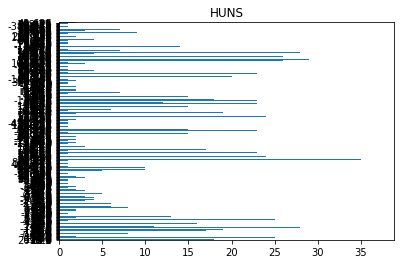

In [27]:
(df['ChickenHuns']
 .value_counts(sort=False)
 .plot.barh()
 .set_title('HUNS')
)

## Exclude Outliers

In [0]:
# Drop observations where ChickenHuns <0 or >35

In [0]:
# Drop observations where any value <0

In [0]:
# Convert date column to datetime

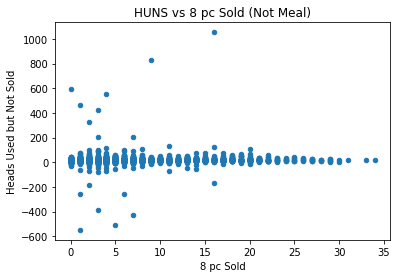

In [41]:
(huns
 .plot
 .scatter(x='8pc', y='ChickenHuns')
 .set(title='HUNS vs 8 pc Sold (Not Meal)',
      xlabel='8 pc Sold',
      ylabel='Heads Used but Not Sold')
);

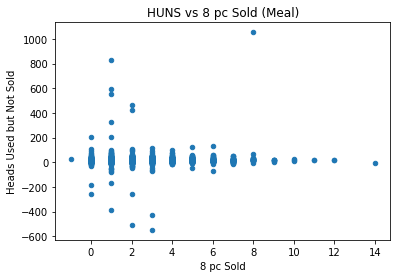

In [42]:
(huns
 .plot
 .scatter(x='8pc Meal', y='ChickenHuns')
 .set(title='HUNS vs 8 pc Sold (Meal)',
      xlabel='8 pc Sold',
      ylabel='Heads Used but Not Sold')
);

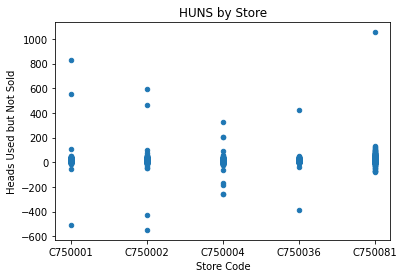

In [45]:
(huns
 .plot
 .scatter(x='StoreCode', y='ChickenHuns')
 .set(title='HUNS by Store',
      xlabel='Store Code',
      ylabel='Heads Used but Not Sold')
);

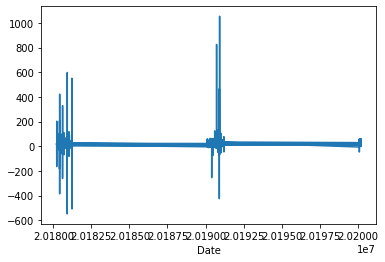

In [44]:
huns.set_index('Date')['ChickenHuns'].plot()

## Log Transform

# Feature Engineering
- All meals
- Yesterday's ChickenHuns
- Yesterday's meals
- Last week, month, etc. (crackdown by regional manager?)
- Weekday/weekend (busier? different manager?)
- Modulus of total pieces divided by eight (a head of chicken is eight pieces)
- Store number (effect of management)
- Ratio of 24pc to 8pc (staff anticipating 24pc but disappointed?)
- Rolling averages of 24pc (inversely related to HUNS?)

# Train/Test Split

# Data Wrangling and Feature Engineering Function

# Fit and Train Model